# Online Retail Sales Data

## Loading libraries

In [1]:

# Install packages
!pip install pandas numpy matplotlib seaborn scikit-learn scipy imbalanced-learn plotnine openpyxl

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from plotnine import ggplot, aes, geom_line
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import openpyxl


## Introduction

**Objective**: The purpose of the database is to analyze an online retail sales database. It will identify any customer segments, and predict the sales levels for each segment. 

#### Customer Segmentation Benefits
* Targeted Marketing: Develop campaigns that resonate more effectively with specific groups, increasing engagement and conversions.
* Enhanced Customer Experience: Personalize communications and offers based on detailed insights like age, category preferences, discount sensitivity, holiday impact, and purchasing frequency, improving satisfaction and loyalty.
* Efficient Resource Allocation: Allocate marketing and operational resources more strategically to maximize ROI, informed by granular customer behaviors and preferences.
* Informed Product Development: Leverage insights into customer behaviors to guide product innovation and meet specific needs, staying ahead of market trends.

#### Segmented Sales Prediction Benefits
* Improved Inventory Forecasting: Enhance inventory and capacity planning, maintain optimal stock levels, reduce overstock and stockouts.
* Planning: Adjust resources and budgets based on predicted sales to adapt pricing strategies and promotional activities to maximize sales during peak buying times
* Risk Management: Anticipate market changes and adjust strategies proactively based on customer segment data to mitigate risks. This helps in staying competitive by rapidly responding to market shifts and competitor moves.
*  Consumer Behavior Visualization: Utilize advanced analytics to visualize and understand consumer behavior patterns, enabling more informed decisions on product placements and marketing campaigns.
* Marketing Spend Optimization: Analyze segment data to allocate marketing budgets more efficiently, ensuring that spending is directed towards the most profitable segments to maximize ROI.
* Effective Inventory Management: Leverage sales predictions to manage inventory levels precisely, aligning stock with predicted consumer demands and minimizing issues like overstocking or stock shortages.
* Targeted Discount Strategies: Implement discount and pricing strategies that are tailored to specific customer segments based on their buying behaviors and price sensitivity, enhancing sales and customer satisfaction.
* Competitive Analysis and Positioning: Perform competitive analysis to ensure that offers, promotions, and products are effectively positioned against competitors, identifying opportunities for differentiation and competitive advantage.

## Method and Results

### Loading Data

In [2]:
#Load data from a csv file

df = pd.read_csv('1SQL.csv')
print(df.head())

   Order_id    Purchase_time  Customer_id Product_category  Quantity   Price  \
0         1  2020/8/15 12:50            1   Home & Kitchen         3  394.67   
1         2  2020/8/16 12:50            2   Home & Kitchen         1  372.39   
2         3  2020/8/17 12:50            3   Home & Kitchen         7  243.14   
3         4  2020/8/18 12:50            4   Home & Kitchen         2   50.23   
4         5  2020/8/19 12:50            5   Home & Kitchen         2   60.82   

  Payment_method  Customer_age Customer_gender Customer_location  \
0      Gift Card            34          Female            Africa   
1    Credit Card            34            Male         Australia   
2    Credit Card            34           Other     North America   
3    Credit Card            34          Female         Australia   
4    Credit Card            34           Other         Australia   

   Full_purchase_amount  Discount Customer_income  Is_holiday  Unnamed: 14  \
0                698.57      0.1

### Data wrangling & cleaning & exploration (EDA)

In [3]:
# Display the shape of the dataset
print("Dataset shape:", df.shape)

# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data types of the features
print("\nData Types:")
print(df.dtypes)

Dataset shape: (301425, 17)

Summary Statistics:
            Order_id    Customer_id       Quantity          Price  \
count  301425.000000  301425.000000  301425.000000  301425.000000   
mean   150713.000000  150713.000000       4.400647     252.397732   
std     87014.046783   87014.046783       2.778290     142.712736   
min         1.000000       1.000000       1.000000       5.000000   
25%     75357.000000   75357.000000       2.000000     129.250000   
50%    150713.000000  150713.000000       4.000000     252.110000   
75%    226069.000000  226069.000000       7.000000     375.450000   
max    301425.000000  301425.000000       9.000000     499.990000   

        Customer_age  Full_purchase_amount       Discount     Is_holiday  \
count  301425.000000         301425.000000  301425.000000  301425.000000   
mean       34.693476           1055.010118       0.132933       0.148063   
std        14.377372            950.932588       0.078924       0.355163   
min        15.000000     

In [4]:
# Remove the unwanted columns
df = df.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

# Verify the columns have been removed by displaying the DataFrame's first few rows
print(df.head())

   Order_id    Purchase_time  Customer_id Product_category  Quantity   Price  \
0         1  2020/8/15 12:50            1   Home & Kitchen         3  394.67   
1         2  2020/8/16 12:50            2   Home & Kitchen         1  372.39   
2         3  2020/8/17 12:50            3   Home & Kitchen         7  243.14   
3         4  2020/8/18 12:50            4   Home & Kitchen         2   50.23   
4         5  2020/8/19 12:50            5   Home & Kitchen         2   60.82   

  Payment_method  Customer_age Customer_gender Customer_location  \
0      Gift Card            34          Female            Africa   
1    Credit Card            34            Male         Australia   
2    Credit Card            34           Other     North America   
3    Credit Card            34          Female         Australia   
4    Credit Card            34           Other         Australia   

   Full_purchase_amount  Discount Customer_income  Is_holiday  
0                698.57      0.15         0-25

In [5]:
# Make required changes after seeing the features 

# Convert 'Purchase_time' to datetime format
df['Purchase_time'] = pd.to_datetime(df['Purchase_time'], format='%Y/%m/%d %H:%M')

# Check the data type to confirm the conversion
print(df['Purchase_time'].dtypes)

datetime64[ns]


#### Feature Engineering

In [6]:
# Convert datetime to more specific time-based features 
df['Year'] = df['Purchase_time'].dt.year
df['Month'] = df['Purchase_time'].dt.month
df['Day'] = df['Purchase_time'].dt.day
df['Hour'] = df['Purchase_time'].dt.hour
df['Weekday'] = df['Purchase_time'].dt.weekday

# Group age to bins
bins = [0, 20, 30, 40, 50, 60, 87]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-87']
df['Age_Range'] = pd.cut(df['Customer_age'], bins=bins, labels=labels, right=False)

# Now use 'Age_Range' in clustering instead of 'Customer_age'

# Ordinal encoding of categorical data 
product_category_encoder = LabelEncoder()
payment_method_encoder = LabelEncoder()
customer_location_encoder = LabelEncoder()
customer_gender_encoder = LabelEncoder()
customer_income_encoder = LabelEncoder()
age_range_encoder = LabelEncoder()

# use labels for categorical features in a DataFrame
df['Product_category_encoded'] = product_category_encoder.fit_transform(df['Product_category'])
df['Payment_method_encoded'] = payment_method_encoder.fit_transform(df['Payment_method'])
df['Customer_location_encoded'] = customer_location_encoder.fit_transform(df['Customer_location'])
df['Customer_gender_encoded'] = customer_gender_encoder.fit_transform(df['Customer_gender'])
df['Customer_income_encoded'] = customer_income_encoder.fit_transform(df['Customer_income'])
df['Age_encoded'] = age_range_encoder.fit_transform(df['Age_Range'])

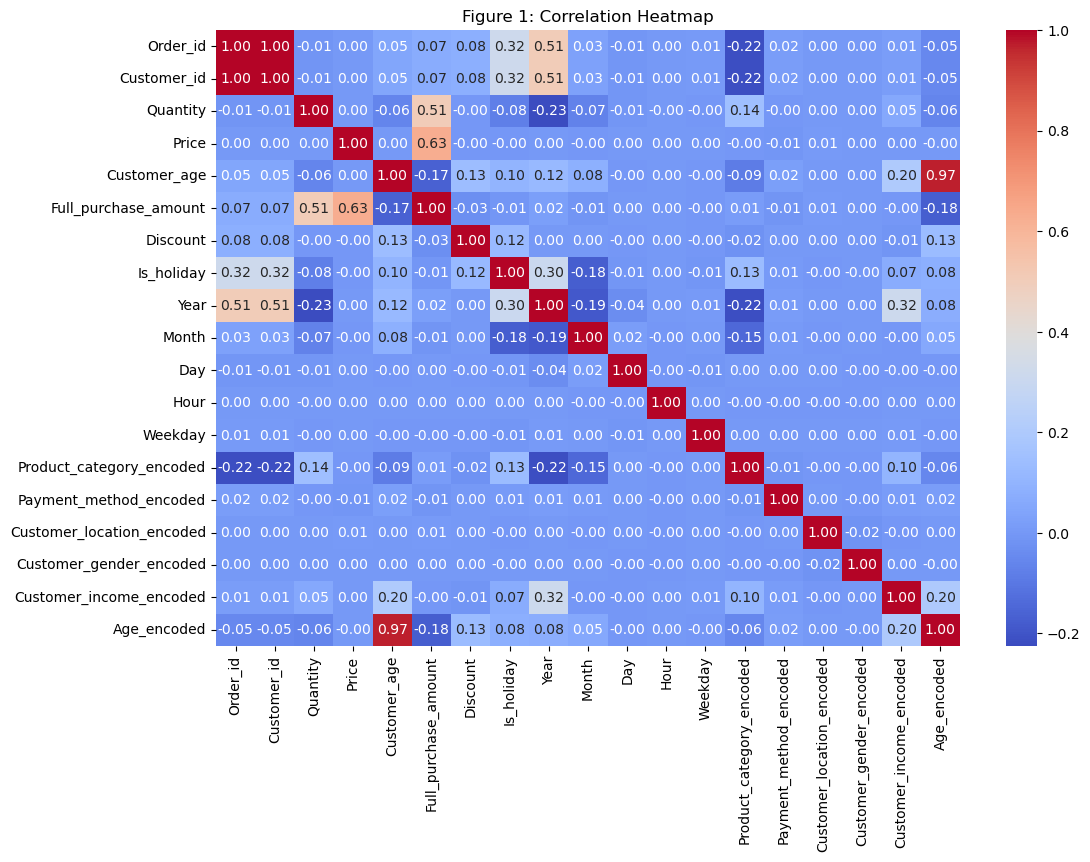

In [7]:
# Display heatmap to examine correlation 
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Figure 1: Correlation Heatmap')
plt.show()

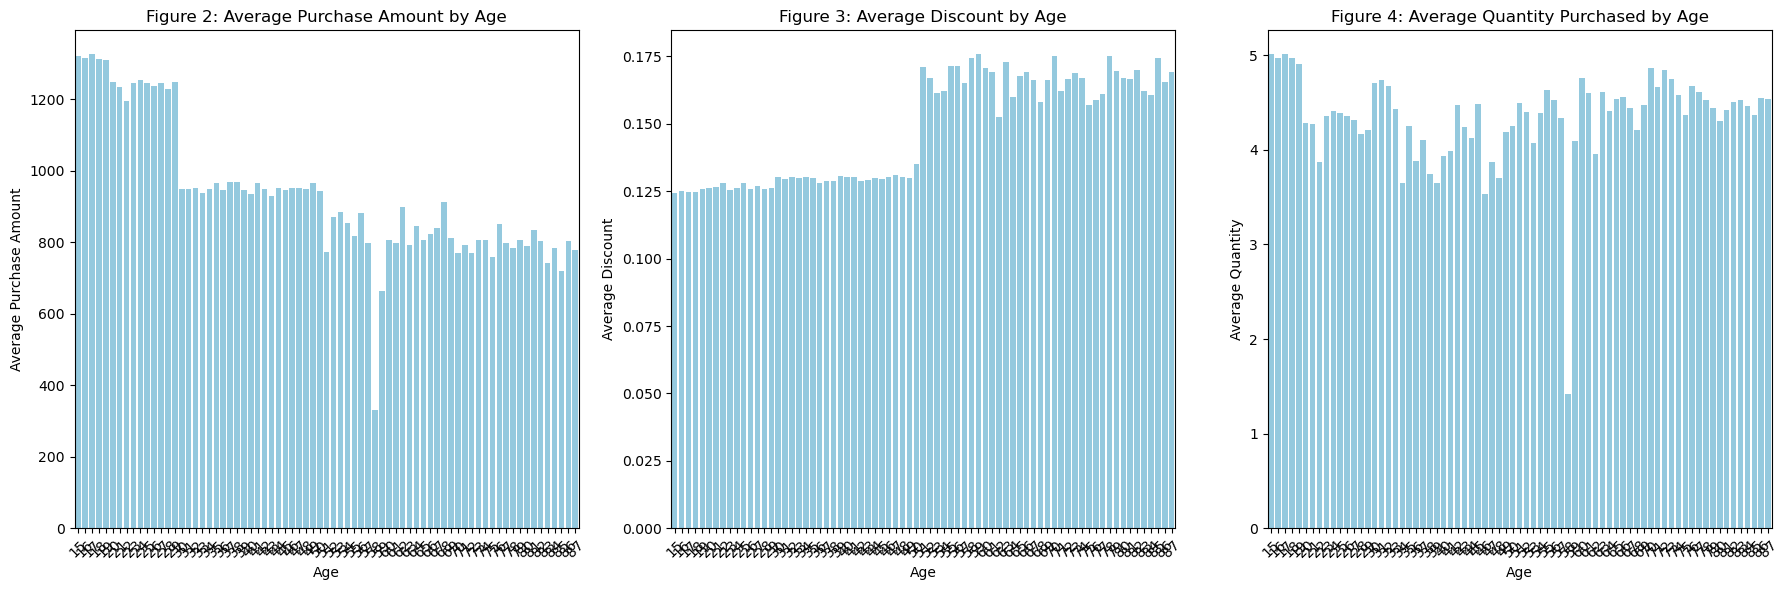

In [8]:
# Visualize Variable to select areas of interest 

#Subplots for Age vs. Purchase Amount, Discount, and Quantity 
age_summary = df.groupby('Customer_age').agg({
    'Full_purchase_amount': 'mean',
    'Discount': 'mean',
    'Quantity': 'mean'
}).reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Subplot 1: Age vs. Purchase Amount
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.barplot(data=age_summary, x='Customer_age', y='Full_purchase_amount', color='skyblue')
plt.title('Figure 2: Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)

# Subplot 2: Age vs. Discount
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.barplot(data=age_summary, x='Customer_age', y='Discount', color='skyblue')
plt.title('Figure 3: Average Discount by Age')
plt.xlabel('Age')
plt.ylabel('Average Discount')
plt.xticks(rotation=45)

# Subplot 3: Age vs. Quantity
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.barplot(data=age_summary, x='Customer_age', y='Quantity', color='skyblue')
plt.title('Figure 4: Average Quantity Purchased by Age')
plt.xlabel('Age')
plt.ylabel('Average Quantity')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

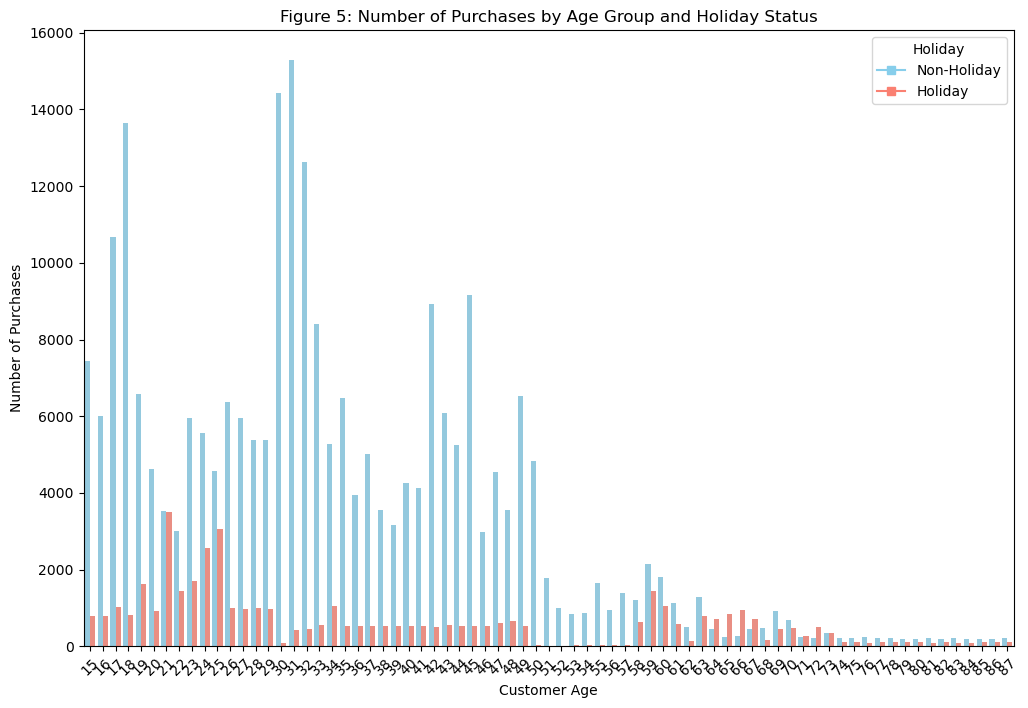

In [9]:
# Group by 'Customer_age' and 'Is_holiday', then count the 'Order_id'
age_holiday_purchases = df.groupby(['Customer_age', 'Is_holiday'])['Order_id'].count().reset_index()
age_holiday_purchases.rename(columns={'Order_id': 'Full_purchase_amount'}, inplace=True)

# Sort the DataFrame by 'Customer_age'
age_holiday_purchases = age_holiday_purchases.sort_values('Customer_age')

# Define the order of ages for the x-axis
age_order = sorted(age_holiday_purchases['Customer_age'].unique())

# Define color palette for hue
palette_colors = {False: 'skyblue', True: 'salmon'}  # False for Non-Holiday, True for Holiday

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=age_holiday_purchases, x='Customer_age', y='Full_purchase_amount', hue='Is_holiday',
            palette=palette_colors, order=age_order)
plt.title('Figure 5: Number of Purchases by Age Group and Holiday Status')
plt.xlabel('Customer Age')
plt.ylabel('Number of Purchases')

# Manually defining legend handles and labels
handles, labels = ax.get_legend_handles_labels()
labels = ['Non-Holiday', 'Holiday']
colors = ['skyblue', 'salmon']
new_handles = [plt.Line2D([], [], color=colors[i], marker='s') for i in range(len(handles))]
plt.legend(handles=new_handles, labels=labels, title='Holiday')
plt.xticks(rotation=45) 
plt.show()


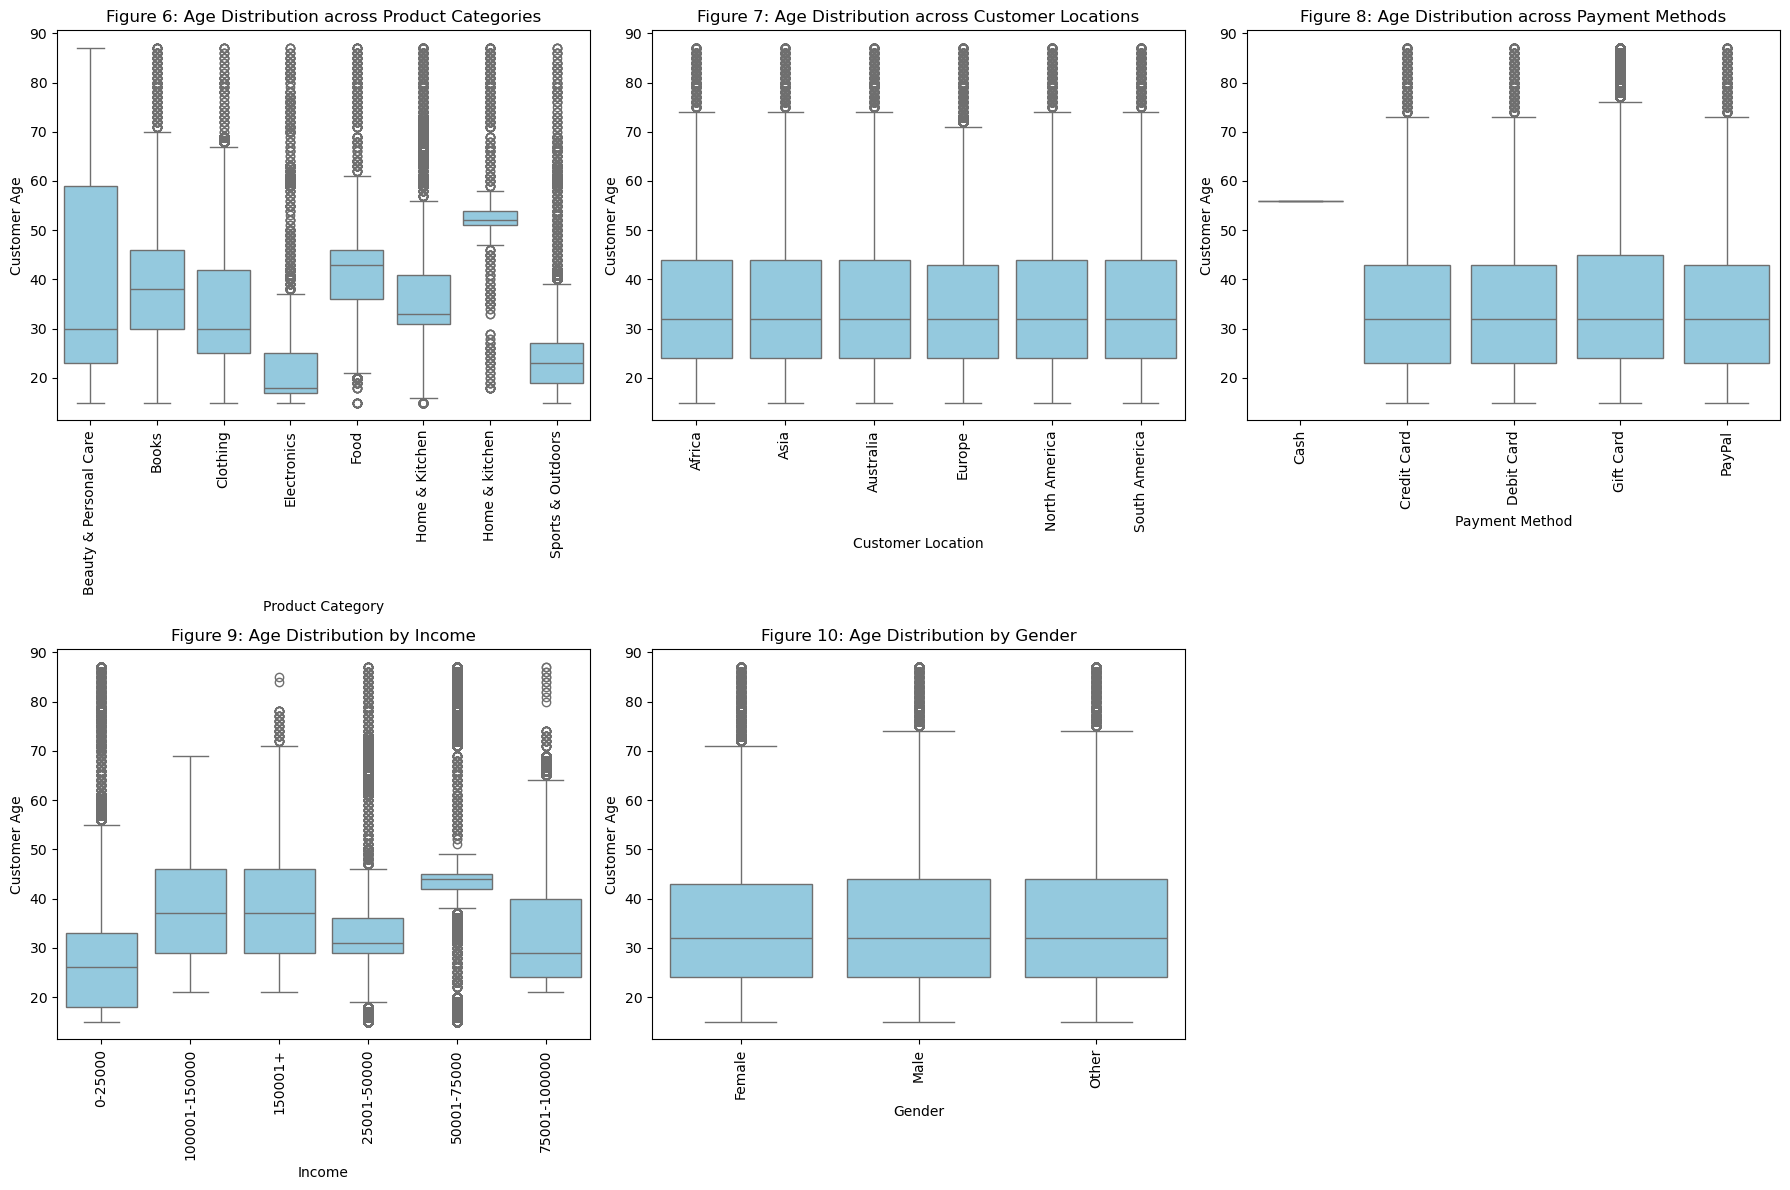

In [10]:
#Store the LabelEncoder for each categorical variable
label_encoders = {}
categories = ['Product_category', 'Payment_method', 'Customer_location', 'Customer_gender', 'Customer_income']

for cat in categories:
    le = LabelEncoder()
    df[cat + '_encoded'] = le.fit_transform(df[cat])
    label_encoders[cat] = le

#Plot
plt.figure(figsize=(18, 12))

# Subplot 1: Age vs. Product Category
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='Product_category_encoded', y='Customer_age', color='skyblue')
plt.title('Figure 6: Age Distribution across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Customer Age')
plt.xticks(range(len(label_encoders['Product_category'].classes_)), label_encoders['Product_category'].inverse_transform(range(len(label_encoders['Product_category'].classes_))), rotation=90)

# Subplot 2: Age vs. Customer Location
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Customer_location_encoded', y='Customer_age', color='skyblue')
plt.title('Figure 7: Age Distribution across Customer Locations')
plt.xlabel('Customer Location')
plt.ylabel('Customer Age')
plt.xticks(range(len(label_encoders['Customer_location'].classes_)), label_encoders['Customer_location'].inverse_transform(range(len(label_encoders['Customer_location'].classes_))), rotation=90)

# Subplot 3: Age vs. Payment Method
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Payment_method_encoded', y='Customer_age', color='skyblue')
plt.title('Figure 8: Age Distribution across Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Customer Age')
plt.xticks(range(len(label_encoders['Payment_method'].classes_)), label_encoders['Payment_method'].inverse_transform(range(len(label_encoders['Payment_method'].classes_))), rotation=90)

# Subplot 4: Age vs. Income
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Customer_income_encoded', y='Customer_age', color='skyblue')
plt.title('Figure 9: Age Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Customer Age')
plt.xticks(range(len(label_encoders['Customer_income'].classes_)), label_encoders['Customer_income'].inverse_transform(range(len(label_encoders['Customer_income'].classes_))), rotation=90)

# Subplot 5: Age vs. Gender
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Customer_gender_encoded', y='Customer_age', color='skyblue')
plt.title('Figure 10: Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Customer Age')
plt.xticks(range(len(label_encoders['Customer_gender'].classes_)), label_encoders['Customer_gender'].inverse_transform(range(len(label_encoders['Customer_gender'].classes_))), rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Customer Segmentation Model (Unsupervised Learning)

In [11]:
#Normalize data
from sklearn.preprocessing import StandardScaler

# Selecting the data
data_to_cluster = df[['Full_purchase_amount', 'Age_encoded', 'Product_category_encoded']]

# Normalizing the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_to_cluster)

In [12]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3,  n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(data_normalized)

# Adding the cluster labels to your DataFrame for later analysis
df['Cluster_Labels'] = cluster_labels

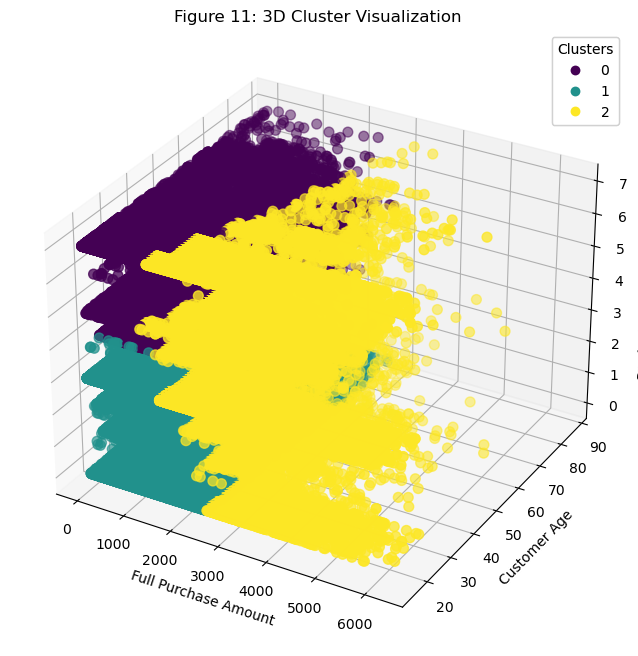

In [13]:
#Visualize the graph 

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Full_purchase_amount'],
                     df['Customer_age'],
                     df['Product_category_encoded'],
                     c=df['Cluster_Labels'], s=50, cmap='viridis')

# Adding labels and title
ax.set_xlabel('Full Purchase Amount')
ax.set_ylabel('Customer Age')
ax.set_zlabel('Product Category Encoded')
ax.set_title('Figure 11: 3D Cluster Visualization')

# Legend for clusters
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


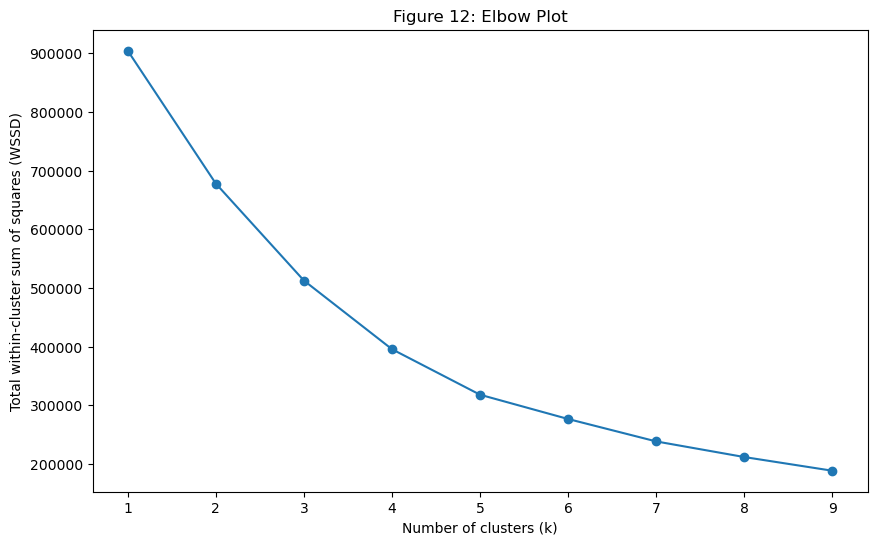

In [14]:
#Visualize elbow graph to identify optimal k

wssd = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_normalized)
    wssd.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wssd, marker='o')
plt.title('Figure 12: Elbow Plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Total within-cluster sum of squares (WSSD)')
plt.xticks(range(1, 10))
plt.show()

In [15]:
# cluster the data into 4 groups, as determined by the optimal k

optimal_k = 4
final_kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
final_kmeans.fit(data_normalized)
df['Optimal_Cluster_Labels'] = final_kmeans.labels_

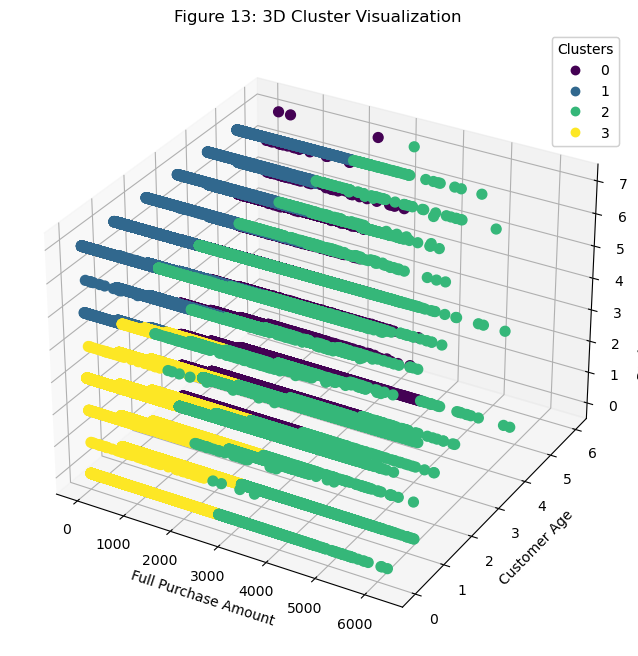

In [16]:
#Visualize the clusters with the optimal k

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Full_purchase_amount'],
                     df['Age_encoded'],
                     df['Product_category_encoded'],
                     c=df['Optimal_Cluster_Labels'], s=50, cmap='viridis', depthshade=False)

# Adding labels and title
ax.set_xlabel('Full Purchase Amount')
ax.set_ylabel('Customer Age')
ax.set_zlabel('Product Category Encoded')
ax.set_title('Figure 13: 3D Cluster Visualization')

# Legend for clusters
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

In [17]:
## Display summary statistics of the model

# Suppose this is the initial fitting of the encoder
label_encoder = LabelEncoder()
df['Product_category_encoded'] = label_encoder.fit_transform(df['Product_category'])
df['Age_encoded'] = label_encoder.fit_transform(df['Age_Range'])

# Check what categories are transformed to ensure correct mapping
print("Encoded categories:", label_encoder.classes_)

# Define a custom function to find the top two frequent categories and return their names as a single string
def top_two_modes(encoder, x):
    counts = x.value_counts()
    top_modes_indices = counts.nlargest(2).index.tolist()
    if len(top_modes_indices) < 2:
        top_modes_indices.append(np.nan)  # Append NaN if there's less than 2 unique values
    # Decode the top two modes to return the category names
    top_modes_names = encoder.inverse_transform([int(i) for i in top_modes_indices if pd.notna(i)])
    # Join the top two modes with a comma
    return ', '.join(top_modes_names)
    
# Aggregations for the groupby operation
aggregations = {
    'Full_purchase_amount': [lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
    'Product_category_encoded': lambda x: top_two_modes(product_category_encoder, x),
    'Age_encoded': lambda x: top_two_modes(age_range_encoder, x)  # if you also want to get mode info for age ranges
}


# Apply custom aggregation rules
cluster_summary = df.groupby('Optimal_Cluster_Labels').agg(aggregations)

# Flatten the column names if necessary
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]

print(cluster_summary)

Encoded categories: ['0-20' '21-30' '31-40' '41-50' '51-60' '61-87' nan]
                        Full_purchase_amount_<lambda_0>  \
Optimal_Cluster_Labels                                    
0                                             217.29940   
1                                             250.85000   
2                                            2118.91680   
3                                             307.16784   

                        Full_purchase_amount_<lambda_1>  \
Optimal_Cluster_Labels                                    
0                                            1134.36810   
1                                            1028.83000   
2                                            3108.33460   
3                                            1203.59172   

                             Product_category_encoded_<lambda>  \
Optimal_Cluster_Labels                                           
0                       Beauty & Personal Care, Home & Kitchen   
1                  

## Sales Prediction (Supervised Learning) - Linear Regression

In [18]:
print(df.columns)

Index(['Order_id', 'Purchase_time', 'Customer_id', 'Product_category',
       'Quantity', 'Price', 'Payment_method', 'Customer_age',
       'Customer_gender', 'Customer_location', 'Full_purchase_amount',
       'Discount', 'Customer_income', 'Is_holiday', 'Year', 'Month', 'Day',
       'Hour', 'Weekday', 'Age_Range', 'Product_category_encoded',
       'Payment_method_encoded', 'Customer_location_encoded',
       'Customer_gender_encoded', 'Customer_income_encoded', 'Age_encoded',
       'Cluster_Labels', 'Optimal_Cluster_Labels'],
      dtype='object')


In [19]:
# Correlation matrix to find relevant features

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric data only
correlation_matrix = numeric_df.corr()
print(correlation_matrix['Full_purchase_amount'].sort_values(ascending=False))

Full_purchase_amount         1.000000
Cluster_Labels               0.669365
Price                        0.629578
Quantity                     0.505954
Optimal_Cluster_Labels       0.199750
Customer_id                  0.066948
Order_id                     0.066948
Year                         0.022789
Product_category_encoded     0.012957
Customer_location_encoded    0.006449
Customer_gender_encoded      0.003406
Hour                         0.001570
Day                          0.000694
Weekday                     -0.001134
Customer_income_encoded     -0.002042
Is_holiday                  -0.007550
Payment_method_encoded      -0.009993
Month                       -0.013436
Discount                    -0.031287
Customer_age                -0.167370
Age_encoded                 -0.176713
Name: Full_purchase_amount, dtype: float64


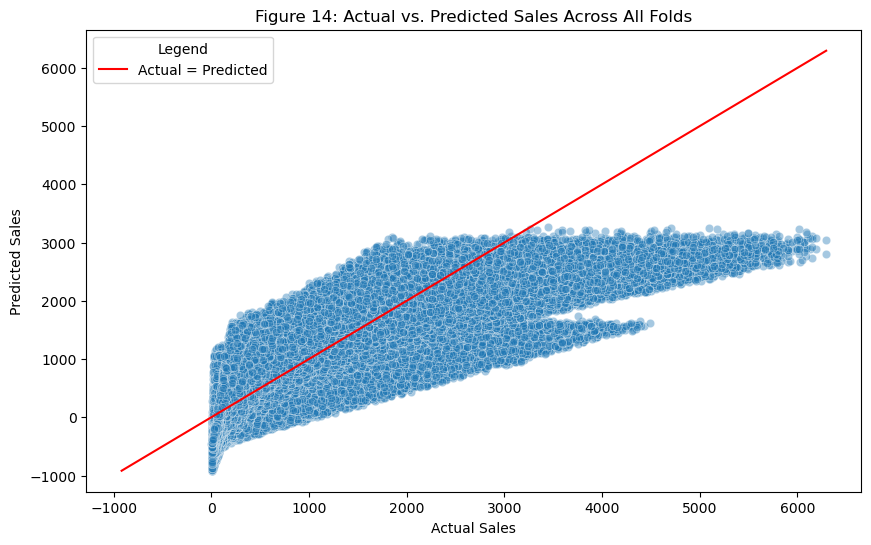

Cross-Validated RMSE scores: [549.9164634311707, 545.4416391902482, 544.6401111428601, 546.3309513042561, 547.1693526331694]
Average RMSE: 546.6997035403408


In [20]:
# Full sales kfolds 

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

X = df[['Price', 'Quantity', 'Year', 'Hour', 'Discount', 'Is_holiday']]
y = df['Full_purchase_amount']

# K-Folds Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

# Lists to store results for plotting
Armse_scores = []
predictions_list = []
actuals_list = []

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    Armse_scores.append(rmse)
    
    predictions_list.extend(predictions)  # For plotting
    actuals_list.extend(y_test)  # For plotting

# Plotting results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actuals_list, y=predictions_list, alpha=0.4)
line_range = [min(actuals_list + predictions_list), max(actuals_list + predictions_list)]
sns.lineplot(x=line_range, y=line_range, color='red', label='Actual = Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Figure 14: Actual vs. Predicted Sales Across All Folds')
plt.legend(title='Legend')
plt.show()

# Print RMSE scores
print(f'Cross-Validated RMSE scores: {Armse_scores}')
print(f'Average RMSE: {np.mean(Armse_scores)}')


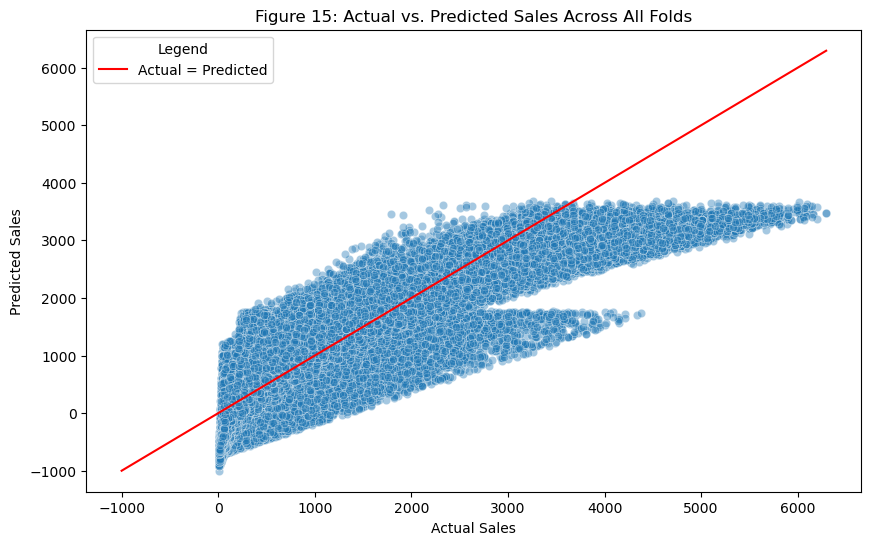

Cross-Validated RMSE scores: [553.0819003591179, 561.1345752328291, 552.6385685052288, 561.8074480749974, 557.5561093197932]
Average RMSE: 557.2437202983932


In [21]:
# Cluster 1 kfolds 

df_cluster1 = df[df['Age_Range'].isin(['0-20', '21-30'])]

# Selecting data for modeling
X = df_cluster1[['Price', 'Quantity', 'Year', 'Hour', 'Discount', 'Is_holiday']]
y = df_cluster1['Full_purchase_amount']

# K-Folds setup
kf = KFold(n_splits=5, random_state=42, shuffle=True)
model = LinearRegression()

# Lists to store results for plotting
A1rmse_scores = []
predictions_list = []
actuals_list = []

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    A1rmse_scores.append(rmse)
    
    predictions_list.extend(predictions)  # For plotting
    actuals_list.extend(y_test)  # For plotting

# Plotting results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actuals_list, y=predictions_list, alpha=0.4)
line_range = [min(actuals_list + predictions_list), max(actuals_list + predictions_list)]
sns.lineplot(x=line_range, y=line_range, color='red', label='Actual = Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Figure 15: Actual vs. Predicted Sales Across All Folds')
plt.legend(title='Legend')
plt.show()

# Print RMSE scores
print(f'Cross-Validated RMSE scores: {A1rmse_scores}')
print(f'Average RMSE: {np.mean(A1rmse_scores)}')

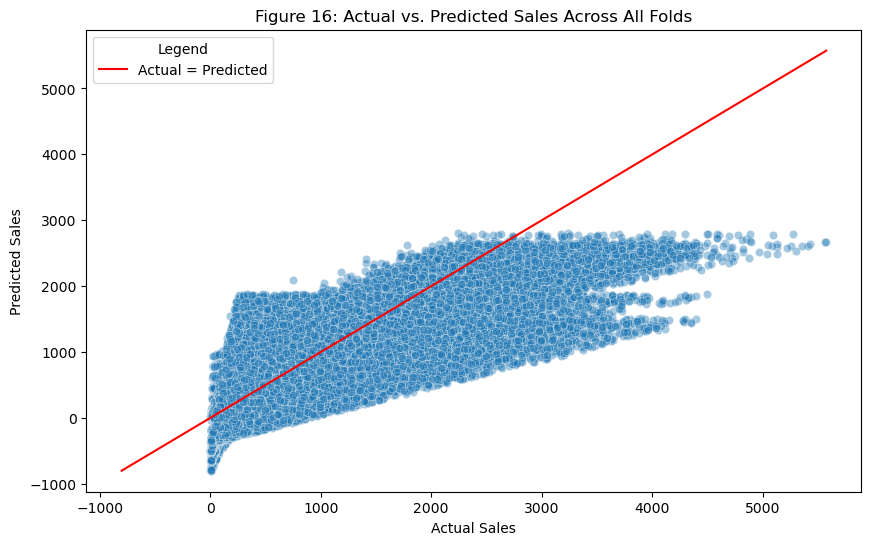

Cross-Validated RMSE scores: [455.52852995727807, 456.3815841000054, 458.86445112290625, 458.4717026598188, 462.5689252700881]
Average RMSE: 458.3630386220193


In [22]:
# Cluster 2 kfolds

df_cluster2 = df[df['Age_Range'].isin(['31-40', '41-50'])]

# Selecting data for modeling
X = df_cluster2[['Price', 'Quantity', 'Year', 'Hour', 'Discount', 'Is_holiday']]
y = df_cluster2['Full_purchase_amount']


# K-Folds setup
kf = KFold(n_splits=5, random_state=42, shuffle=True)
model = LinearRegression()

# Lists to store results for plotting
A2rmse_scores = []
predictions_list = []
actuals_list = []

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    A2rmse_scores.append(rmse)
    
    predictions_list.extend(predictions)  # For plotting
    actuals_list.extend(y_test)  # For plotting

# Plotting results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actuals_list, y=predictions_list, alpha=0.4)
line_range = [min(actuals_list + predictions_list), max(actuals_list + predictions_list)]
sns.lineplot(x=line_range, y=line_range, color='red', label='Actual = Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Figure 16: Actual vs. Predicted Sales Across All Folds')
plt.legend(title='Legend')
plt.show()

# Print RMSE scores
print(f'Cross-Validated RMSE scores: {A2rmse_scores}')
print(f'Average RMSE: {np.mean(A2rmse_scores)}')

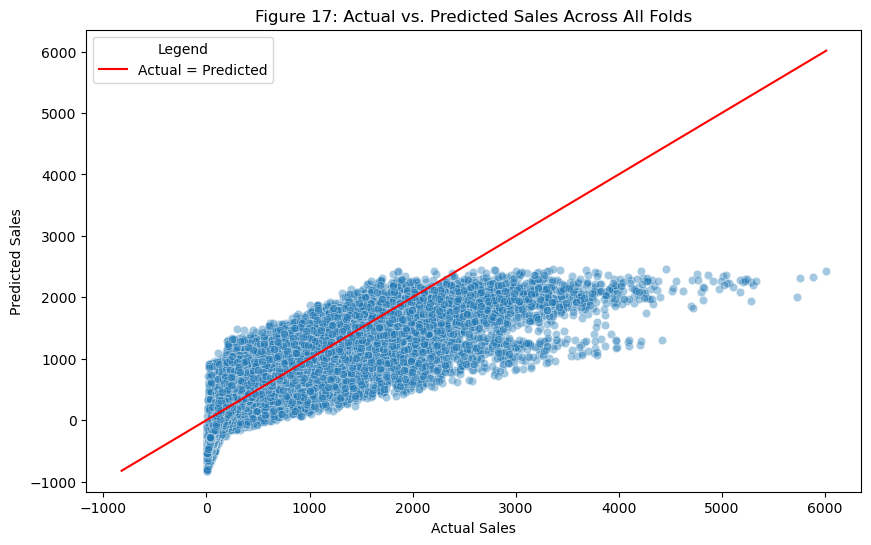

Cross-Validated RMSE scores: [448.5237638923869, 436.4219310444445, 444.5925182188577, 437.99947040198623, 427.89301229976394]
Average RMSE: 439.08613917148784


In [23]:
# Cluster 3 kfolds 

df_cluster3 = df[df['Age_Range'].isin(['51-60', '61-87'])]

# Selecting data for modeling
X = df_cluster3[['Price', 'Quantity', 'Year', 'Hour', 'Discount', 'Is_holiday']]
y = df_cluster3['Full_purchase_amount']


# K-Folds setup
kf = KFold(n_splits=5, random_state=42, shuffle=True)
model = LinearRegression()

# Lists to store results for plotting
A3rmse_scores = []
predictions_list = []
actuals_list = []

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    A3rmse_scores.append(rmse)
    
    predictions_list.extend(predictions)  # For plotting
    actuals_list.extend(y_test)  # For plotting

# Plotting results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actuals_list, y=predictions_list, alpha=0.4)
line_range = [min(actuals_list + predictions_list), max(actuals_list + predictions_list)]
sns.lineplot(x=line_range, y=line_range, color='red', label='Actual = Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Figure 17: Actual vs. Predicted Sales Across All Folds')
plt.legend(title='Legend')
plt.show()

# Print RMSE scores
print(f'Cross-Validated RMSE scores: {A3rmse_scores}')
print(f'Average RMSE: {np.mean(A3rmse_scores)}')

## Random Forest Sales Prediction 

In [24]:
#Using Random Forest to see if we can reduce the RMSE -> Non linear relationships 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

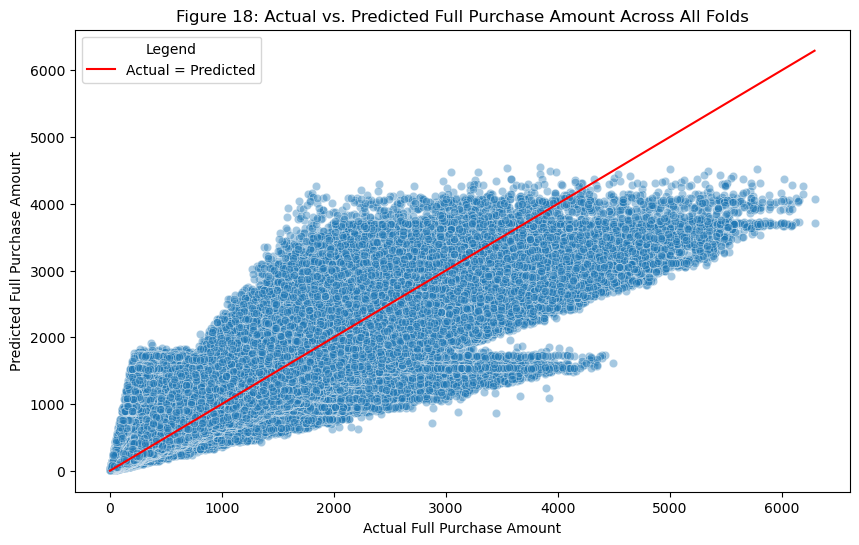

Cross-Validated RMSE scores: [429.2298187834211, 427.9918794397498, 428.292448247913, 426.79238545693175, 429.4866905440316]
Average RMSE: 428.3586444944094


In [25]:
#Full model 

# Selecting data for modeling
X = df[['Price', 'Quantity', 'Year', 'Hour', 'Discount', 'Is_holiday']]
y = df['Full_purchase_amount']  # Full_purchase_amount is the target (sales)

# K-Folds Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# Lists to store results for final plotting and RMSE calculation
all_predictions = []
all_actuals = []
Brmse_scores = []

# Loop to process each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    Brmse_scores.append(rmse)
    
    # Store predictions and actuals for final plot
    all_predictions.extend(predictions)
    all_actuals.extend(y_test)

# Plotting actual vs. predicted values for all data points across all folds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=all_actuals, y=all_predictions, alpha=0.4)
line_range = [min(all_actuals), max(all_actuals)]
sns.lineplot(x=line_range, y=line_range, color='red', label='Actual = Predicted')
plt.xlabel('Actual Full Purchase Amount')
plt.ylabel('Predicted Full Purchase Amount')
plt.title('Figure 18: Actual vs. Predicted Full Purchase Amount Across All Folds')
plt.legend(title='Legend')
plt.show()

# Print RMSE scores and average
print(f'Cross-Validated RMSE scores: {Brmse_scores}')
print(f'Average RMSE: {np.mean(Brmse_scores)}')


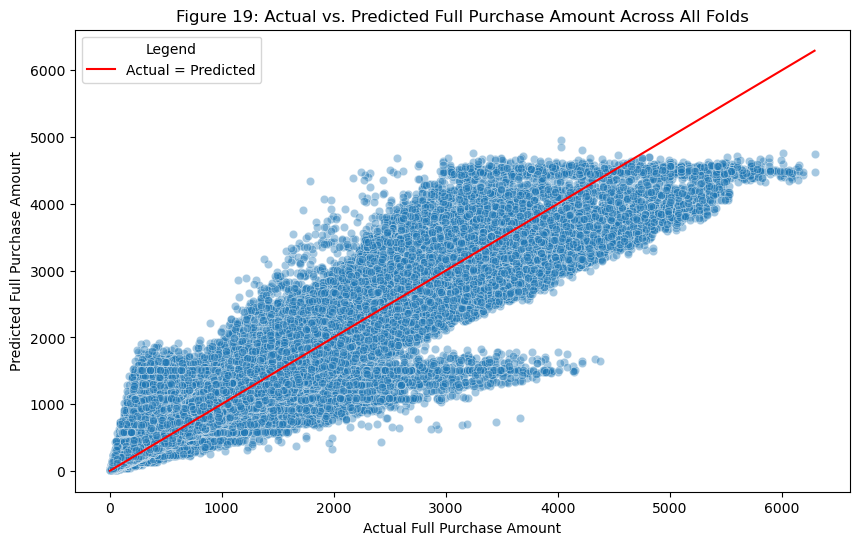

Cross-Validated RMSE scores: [387.66853537130436, 393.7355261738371, 390.9006542548435, 395.42940764753513, 397.19781286185184]
Average RMSE: 392.98638726187437


In [26]:
#Cluster 1 k folds

df_cluster1 = df[df['Age_Range'].isin(['0-20', '21-30'])]

# Selecting data for modeling
X = df_cluster1[['Price', 'Quantity', 'Year', 'Hour', 'Discount', 'Is_holiday']]
y = df_cluster1['Full_purchase_amount']

# K-Folds Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# Lists to store results for final plotting and RMSE calculation
all_predictions = []
all_actuals = []
B1rmse_scores = []

# Loop to process each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    B1rmse_scores.append(rmse)
    
    # Store predictions and actuals for final plot
    all_predictions.extend(predictions)
    all_actuals.extend(y_test)

# Plotting actual vs. predicted values for all data points across all folds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=all_actuals, y=all_predictions, alpha=0.4)
line_range = [min(all_actuals), max(all_actuals)]
sns.lineplot(x=line_range, y=line_range, color='red', label='Actual = Predicted')
plt.xlabel('Actual Full Purchase Amount')
plt.ylabel('Predicted Full Purchase Amount')
plt.title('Figure 19: Actual vs. Predicted Full Purchase Amount Across All Folds')
plt.legend(title='Legend')
plt.show()

# Print RMSE scores and average
print(f'Cross-Validated RMSE scores: {B1rmse_scores}')
print(f'Average RMSE: {np.mean(B1rmse_scores)}')


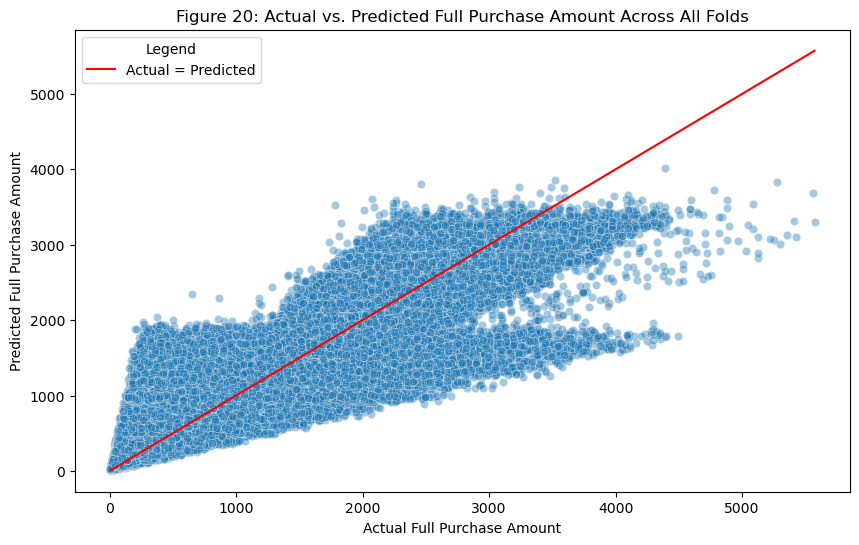

Cross-Validated RMSE scores: [349.93074093928954, 349.3869577070663, 351.1766929207938, 351.0593982830886, 354.6942146434944]
Average RMSE: 351.24960089874656


In [27]:
#Cluster 2 k folds

df_cluster2 = df[df['Age_Range'].isin(['31-40', '41-50'])]

# Selecting data for modeling
X = df_cluster2[['Price', 'Quantity', 'Year', 'Hour', 'Discount', 'Is_holiday']]
y = df_cluster2['Full_purchase_amount']

# K-Folds Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# Lists to store results for final plotting and RMSE calculation
all_predictions = []
all_actuals = []
B2rmse_scores = []

# Loop to process each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    B2rmse_scores.append(rmse)
    
    # Store predictions and actuals for final plot
    all_predictions.extend(predictions)
    all_actuals.extend(y_test)

# Plotting actual vs. predicted values for all data points across all folds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=all_actuals, y=all_predictions, alpha=0.4)
line_range = [min(all_actuals), max(all_actuals)]
sns.lineplot(x=line_range, y=line_range, color='red', label='Actual = Predicted')
plt.xlabel('Actual Full Purchase Amount')
plt.ylabel('Predicted Full Purchase Amount')
plt.title('Figure 20: Actual vs. Predicted Full Purchase Amount Across All Folds')
plt.legend(title='Legend')
plt.show()

# Print RMSE scores and average
print(f'Cross-Validated RMSE scores: {B2rmse_scores}')
print(f'Average RMSE: {np.mean(B2rmse_scores)}')


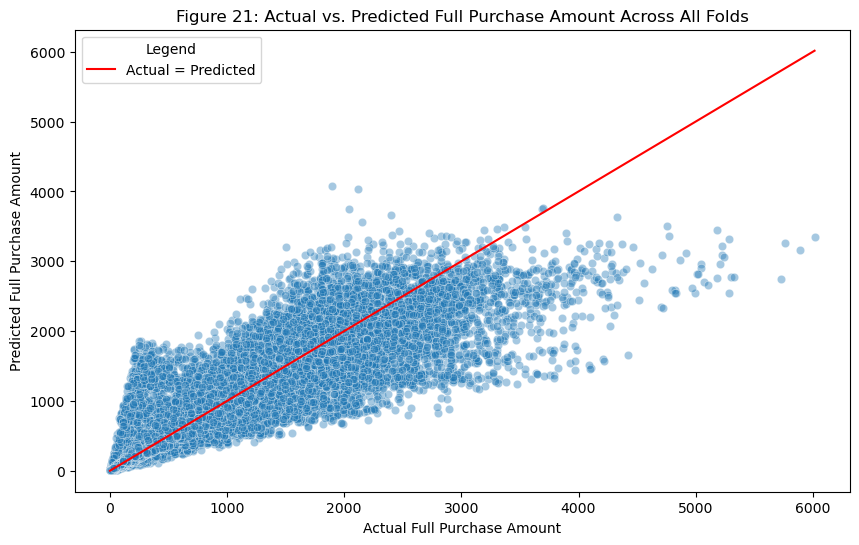

Cross-Validated RMSE scores: [343.74818436048946, 338.3465625705447, 343.02911534366376, 340.1985819677995, 326.8297220650665]
Average RMSE: 338.4304332615128


In [28]:
#Cluster 3 k folds

# Create cluster based on age range
df_cluster3 = df[df['Age_Range'].isin(['51-60', '61-87'])]

# Selecting data for modeling
X = df_cluster3[['Price', 'Quantity', 'Year', 'Hour', 'Discount', 'Is_holiday']]
y = df_cluster3['Full_purchase_amount']

# K-Folds Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# Lists to store results for final plotting and RMSE calculation
all_predictions = []
all_actuals = []
B3rmse_scores = []

# Loop to process each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    B3rmse_scores.append(rmse)
    
    # Store predictions and actuals for final plot
    all_predictions.extend(predictions)
    all_actuals.extend(y_test)

# Plotting actual vs. predicted values for all data points across all folds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=all_actuals, y=all_predictions, alpha=0.4)
line_range = [min(all_actuals), max(all_actuals)]
sns.lineplot(x=line_range, y=line_range, color='red', label='Actual = Predicted')
plt.xlabel('Actual Full Purchase Amount')
plt.ylabel('Predicted Full Purchase Amount')
plt.title('Figure 21: Actual vs. Predicted Full Purchase Amount Across All Folds')
plt.legend(title='Legend')
plt.show()

# Print RMSE scores and average
print(f'Cross-Validated RMSE scores: {B3rmse_scores}')
print(f'Average RMSE: {np.mean(B3rmse_scores)}')


### Model Comparison

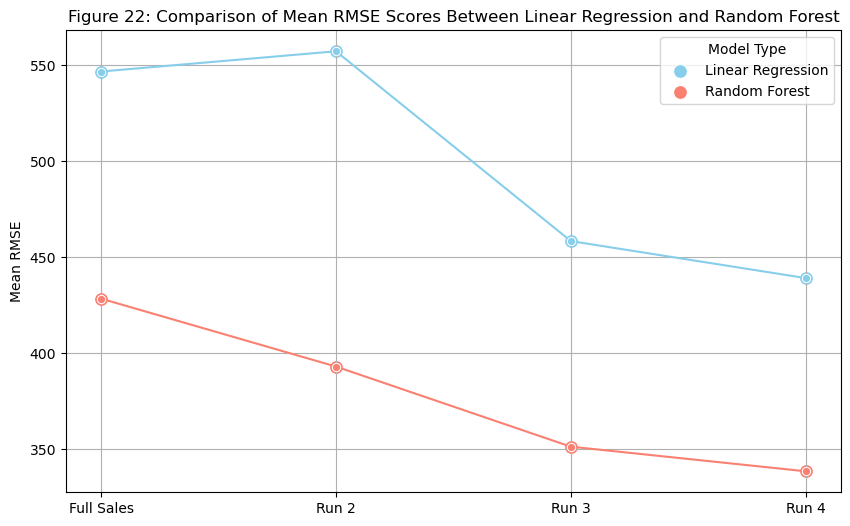

Armse_scores: [549.9164634311707, 545.4416391902482, 544.6401111428601, 546.3309513042561, 547.1693526331694]
A1rmse_scores: [553.0819003591179, 561.1345752328291, 552.6385685052288, 561.8074480749974, 557.5561093197932]
A2rmse_scores: [455.52852995727807, 456.3815841000054, 458.86445112290625, 458.4717026598188, 462.5689252700881]
A3rmse_scores: [448.5237638923869, 436.4219310444445, 444.5925182188577, 437.99947040198623, 427.89301229976394]
Brmse_scores: [429.2298187834211, 427.9918794397498, 428.292448247913, 426.79238545693175, 429.4866905440316]
B1rmse_scores: [387.66853537130436, 393.7355261738371, 390.9006542548435, 395.42940764753513, 397.19781286185184]
B2rmse_scores: [349.93074093928954, 349.3869577070663, 351.1766929207938, 351.0593982830886, 354.6942146434944]
B3rmse_scores: [343.74818436048946, 338.3465625705447, 343.02911534366376, 340.1985819677995, 326.8297220650665]


In [29]:
#Plot RMSE values for Linear Regression and Random Forest to find the optimal model

A_means = [np.mean(Armse_scores), np.mean(A1rmse_scores), np.mean(A2rmse_scores), np.mean(A3rmse_scores)]
B_means = [np.mean(Brmse_scores), np.mean(B1rmse_scores), np.mean(B2rmse_scores), np.mean(B3rmse_scores)]

# Labels for each run
labels = ['Full Sales', 'Run 2', 'Run 3', 'Run 4']

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=labels, y=A_means, color='skyblue', s=100, label='Linear Regression')
sns.scatterplot(x=labels, y=B_means, color='salmon', s=100, label='Random Forest')

# Draw trend lines
sns.lineplot(x=labels, y=A_means, color='skyblue', marker='o')
sns.lineplot(x=labels, y=B_means, color='salmon', marker='o')

plt.title('Figure 22: Comparison of Mean RMSE Scores Between Linear Regression and Random Forest')
plt.ylabel('Mean RMSE')
plt.legend(title='Model Type')
plt.grid(True)
plt.show()

#Display RMSE values
print("Armse_scores:", Armse_scores)
print("A1rmse_scores:", A1rmse_scores)
print("A2rmse_scores:", A2rmse_scores)
print("A3rmse_scores:", A3rmse_scores)
print("Brmse_scores:", Brmse_scores)
print("B1rmse_scores:", B1rmse_scores)
print("B2rmse_scores:", B2rmse_scores)
print("B3rmse_scores:", B3rmse_scores)

## Model Interpretation and Recommendations


The results from the customer segmentation and sales prediction models provide a comprehensive view of customer behavior and sales forecasting, crucial for strategic planning and operational adjustments.


### Customer Segmentation Model
- **Clusters Identified**: The unsupervised learning model identified four optimal clusters based on customer demographics and purchasing behavior (see Figure 13), as suggested by the elbow method (see Figure 12). Each cluster represents a distinct segment of the customer base, characterized by age groups and product category preferences:

- #### **Cluster 0**: Older Age Groups (51-87 years)
    - **Interests**: This cluster shows a pronounced preference for beauty and personal care products, along with home products. These interests may reflect a focus on self-care, maintenance, and comfort, characteristics often valued by this demographic.
    - **Behavioral Insights**: Customers in this age range might be more brand loyal and less price-sensitive compared to other segments. They might prefer purchasing products that ensure quality and reliability, which suggests an opportunity for upselling higher-end or premium products.
    - **Marketing Strategy**: Tailored marketing for this group could involve emphasizing product reliability, comfort, and health benefits. Marketing channels such as traditional media (TV, radio) and print (magazines, newspapers) could be effective alongside targeted online campaigns.
    - **Product Development**: Products that cater to ease of use, ergonomics, and health benefits (e.g., skincare products for sensitive skin, ergonomic home tools) could be particularly appealing to this segment.

- #### **Cluster 1**: Middle-Aged Groups (31-50 years)
    - **Interests**: Customers in this cluster focus on home and food products. This interest might be driven by their lifestyle, possibly balancing family life and career, which emphasizes the need for practical and time-saving solutions.
    - **Behavioral Insights**: This segment might be interested in value for money, quality, and products that offer convenience. There is likely a significant interest in online shopping platforms that provide quick delivery options.
    - **Marketing Strategy**: Engaging this segment might involve campaigns highlighting product efficiency, family benefits, and cost-effectiveness. Promotions during back-to-school seasons or major holidays could be particularly effective.
    - **Product Development**: Consider developing multi-functional or eco-friendly products that cater to a home-centric lifestyle, or meal kits and other food products that save time while offering nutritional benefits.

- #### **Cluster 2**: Younger Adults (21-40 years)
    - **Interests**: This demographic shows a strong inclination towards electronics and food, indicating a blend of tech-savviness and a fast-paced lifestyle. They are likely to be early adopters of new technology and value convenience in meal solutions.
    - **Behavioral Insights**: This group is probably more experimental and less brand loyal, driven by trends and online reviews. They may prefer shopping online and are likely influenced by influencer marketing and peer recommendations.
    - **Marketing Strategy**: Digital marketing strategies including social media campaigns, influencer partnerships, and email marketing could be particularly effective. Highlighting the latest tech features, usability, and trendy aspects of the products can capture their interest.
    - **Product Development**: Innovations in technology that integrate seamlessly with a connected lifestyle (smart home products, wearable tech) and convenient, health-oriented food products could resonate well with this segment.

- #### **Cluster 3**: The Youngest Demographic (0-30 years)
    - **Interests**: Focused on electronics and beauty/personal care products, this cluster likely values both innovation and personal image. The interest in personal care products at a younger age may also indicate a strong influence of social media on consumer habits.
    - **Behavioral Insights**: Customers in this age group are usually more price-sensitive, seeking the best value for money. They tend to be highly influenced by social media trends and are more likely to engage in online shopping.
    - **Marketing Strategy**: Leveraging trendy and visually appealing advertising on platforms like Instagram, TikTok, and Snapchat can be very effective. Promotions, discounts, and limited-time offers could drive quick purchasing decisions.
    - **Product Development**: Developing affordable, trendy electronics that cater to the entertainment needs of this age group, along with eco-friendly and cruelty-free beauty products, can meet the ethical and aesthetic expectations of younger consumers.


**Overlapping Age Groups**: For the model going forward, the clusters were consolidated from 4 to 3. This decision was due to overlapping age groups. Cluster 2 has age groups that overlaps with Cluster 3 and Cluster 1. This approach is to streamline the model and focus on distinct segments that exhibit unique purchasing patterns.


### Sales Prediction Model
- **Model Performance**: The evaluation of model performance using RMSE (Root Mean Square Error) shows that the Random Forest model outperformed the Linear Regression across all clusters (see Figure 22). This suggests that the Random Forest model is better at capturing the non-linear relationships and interactions between features within the dataset.
- **Cluster 1**: Young and youngest demographics show significantly improved prediction accuracy in the Random Forest model, likely due to the model's ability to handle the variability and complexities of younger consumer behavior.
- **Cluster 2**: The middle-aged segment also demonstrated better results with Random Forest, suggesting that this model is more adept at forecasting for groups with varied product interests.
- **Cluster 3**: The oldest demographic showed the most substantial improvement in prediction accuracy with Random Forest, underscoring its effectiveness in dealing with segments that may have more stable but diverse purchasing patterns.


## Discussion

The integration of customer segmentation and sales prediction models provides a robust framework for enhancing business strategies through targeted marketing, optimized inventory management, and improved customer satisfaction. The key conclusions and recommendations are:

- **Random Forest as Preferred Model**: Given its superior performance, Random Forest should be adopted for ongoing sales predictions. Its ability to handle complex datasets with various features makes it suitable for dynamic retail environments. However, exploring other predictive models such as Gradient Boosting Machines (GBM) or deep learning approaches could potentially uncover even more accurate predictive insights, particularly for non-linear and complex data interactions.
  
- **Explore Alternative Predictive Models**: While the Random Forest model performs well, there is always room for exploration with other advanced machine learning models. Techniques such as XGBoost, LightGBM, or even neural networks might offer improvements in accuracy and efficiency, especially as the dataset grows and evolves. Testing these models could provide a comparative insight into their performance relative to traditional methods.

- **Focus on Tailored Marketing Strategies**: Leveraging insights from the segmentation model, marketing efforts can be more precisely tailored to meet the unique needs of each customer cluster, potentially increasing engagement and sales conversions.

- **Enhance Inventory and Resource Allocation**: Predictive insights from the sales model should inform inventory control and resource allocation, ensuring that products are stocked in alignment with predicted demands, thus minimizing overstocks and stockouts.

- **Continuous Model Tuning and Update**: Periodic reevaluation and tuning of the models are recommended to adapt to changing customer behaviors and market conditions. Incorporating more granular data, such as transaction frequencies and seasonal variations, could further refine the predictions.

### Future Questions to Explore
- **Impact of External Factors**: How do external factors such as economic changes, market trends, and seasonal effects influence customer purchasing behaviors and model predictions?
- **Brand Loyalty Insights**: How does brand loyalty vary across different customer segments and how can this influence new product launches or rebranding efforts?
- **Competitive Benchmarking**: How do our products perform in comparison to competitors within each customer segment?
- **Longitudinal Customer Behavior**: Can we track changes in customer behavior over time to predict future trends more accurately?
- **Personalization at Scale**: How can we scale personalized marketing and product offerings without significantly increasing operational complexity and costs?
- **Integration of Real-Time Data**: What improvements can be made by integrating real-time data feeds into the prediction models to capture up-to-the-minute trends and behaviors?
- **Customer Feedback and Sentiment Analysis**: Can analyzing customer feedback and sentiment provide deeper insights into the effectiveness of current marketing strategies and product positioning?
- **Promotional Strategy Effectiveness**: Which promotions or discounts have driven the most sales in each segment, and how can this data inform future promotional strategies?

By acting on these insights and exploring these questions, this online retail business can not only enhance its operational efficiency and drive better customer engagement but also maintain a competitive edge in a rapidly evolving market landscape.

## Next Steps

Following the analysis from the customer segmentation and sales prediction models, the next phase involves developing an interactive Tableau dashboard

###  Objectives Supported by the Dashboard

1. **Visualize Consumer Behavior**: Graphically represent purchasing patterns and trends across different customer segments to quickly identify changes and emerging trends.
2. **Optimize Marketing Spend**: Analyze the effectiveness of marketing campaigns to reallocate budgets to the most effective channels, maximizing marketing ROI.
3. **Manage Inventory**: Link sales forecasts to inventory requirements, helping maintain optimal stock levels and reduce overstocks or shortages.
4. **Implement Targeted Discount Strategies**: Use past sales data related to discounts and promotions to craft strategies that resonate with specific segments, increasing sales and satisfaction.
5. **Increase ROI**: Integrate various data insights into a single dashboard to enhance strategic decision-making and operational efficiency.

Thee dashboard will streamline operations, enhance strategic decisions, and contribute to sustained business growth by providing a comprehensive overview of key business metrics.